 Table of Contens
1. Pengumpulan Data
2. Menelaah Data
3. Validasi Data
4. Menentukan Object Data
5. Membersihkan Data
6. Konstruksi Data
7. Modeling
8. Evaluasi
9. Streamlit
10. Kesimpulan

## Pengumpulan Data
Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease
Dataset yang dipakai adalah dataset dengan nama file "Hungarian.data" diharapkan sebelum memakai dataset tersebut anda dapat membaca
deskripsi dataset yang ada di dalam file "heart-disease.names"

## Menelaah Data

In [1]:
import pandas as pd
import re
import numpy as np
import itertools

Coding diatas merupakan</br>
Import pandas as pd digunakan untuk melakukan membaca, menganalisis, dan menulis data dalam format DataFrame.</br>
Import re digunakan untuk melakukan operasi pencocokan dan mengoperasi string dengan menggunakan pola – pola tertentu.</br>
Import numpy as np digunakan untuk kegiatan mengoperasikan matematika dan dalam mengoperasikan tipe data array.</br>
Import intertools digunakan untuk menghasilkan iterasi secara efisien, digunakan seperti kombinasi atau permutasi dari elemen – elemen yang digunakan.


### Load Data

masukkan dataset yang dibutuhkan dengan alamat penyimpanan yang tepat dan simpan kedalam sebuah variabel

In [2]:
dir = 'hungarian.data'

Memasukkan data yang akan diolah yaitu hungarian.data dengan menggunakan variabel directory.

In [3]:
#buatlah iterasi untuk membaca dataset
with open(dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

Coding diatas </br>
Membuat iterasi untuk membaca dataset kemudian setelah membaca file dan memproses setiap barisnya, kode berikutnya mencetak 10 baris pertama dari list lines menggunakan slicing (lines[0:10]). Ini berarti kita hanya akan melihat elemen-elemen dari indeks 0 hingga 9 (10 baris pertama).

In [4]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


a.	Penggunakan intertools untuk mengambil elemen dari pengelompokkan dari setiap grup adalah 76.</br>
b.	Melakukan pengelompokkan baris – baris file menjadi grup 10 baris.</br>
c.	Kemudian membuat DataFrame baru dengan variabel df dari data yang diperoleh dari pemrosesan interpools.</br>
d.	Menampilkan data 5 baris pertama dengan df.head()</br>



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Menampilkan informasi dari file dataset pada variabel df, terlihat pada informasi diatas data bertipe object.

In [6]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

a.	Memilih baris dan kolom tertentu dengan iloc</br>
b.	Memilih semua baris (:) dan semua kolom kecuali kolom terakhir (:-1).</br>
c.	Menggunakan df.drop untuk menghapus kolom pertama dari DataFrame yaitu columns[0]</br>


In [7]:
#mengubah tipe data file dataset menjadi tipe data float 
df = df.astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

a.	Mengubah tipe data yang semula object menjadi float menggunakan df.astype</br>
b.	Melakukan pengecekan informasi data terbaru menggunakan df.info, mengecek apakah tipe data sudah berubah menjadi float



## Validasi Data
Pada tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya

In [9]:
df.replace(-9.0, np.nan, inplace=True)

Mengubah isi data yang merupakan missing value yaitu -9 menjadi Nan supaya nanti dapat dirubah nilainya menggunakan df.replace.



In [10]:
#Mengecek informasi nilai null value menggunakan df.isnull
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [11]:
df. head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


Coding diatas</br>
Melakukan pengecekan pada data menggunakan df.head, dan membuktikan bahwa nilai missing value dirubah ke Nan.

In [12]:
#Melakukan pengecekan informasi isi pada data yang terupdate.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

## Menentukan Object Data

In [13]:
#Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


Coding diatas</br>
Melakukan pemilihan fitur yang akan digunakan sesuai dengan pada deskripsi dataset yaitu 14 fitur dengan menggunakan df.iloc, kemudian membuat DataFrame baru yaitu df_selected.



In [14]:
#Melakukan pengcekkan informasi pada df_selected
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [15]:
column_mapping = {
2: 'age',
3: 'sex',
8: 'cp',
9: 'trestbps',
11: 'chol',
15: 'fbs',
18: 'restecg',
31: 'thalach',
37: 'exang',
39: 'oldpeak',
40: 'slope',
43: 'ca',
50: 'thal',
57: 'target'
}
df_selected.rename(columns=column_mapping, inplace=True)

C:\Users\NEL\AppData\Local\Temp\ipykernel_3220\3605329661.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


Coding diatas</br>
Melakukan perubahan nama kolom pada fitur yang ada pada deskripsi dataset dengan menggunakan column_mapping



In [16]:
#Melakukan pengecekan pada dataframe df_selected untuk memastikan perubahan nama kolom.
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [17]:
#Menghitung jumlah fitur pada DataFrame df_selected
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

## Membersihkan Data

Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat
menghitung jumlah null values yang ada diddalam dataset

In [18]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Coding diatas</br>
Melakukan pengecekkan jumlah null pada dataframe, dapat terlihat pada informasi diatas kolom slope, ca, dan thal datanya lebib dari 90% merupakan missing value, maka pada langkah berikutnya harus dihapus.

In [19]:
#Melakukan penghapusan pada kolom slope, ca, dan thal
columns_to_drop = ['ca', 'slope','thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [20]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Coding diatas</br>
Melakukan pengecekkan null pada dataframe df_selected yang terupdate. Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [21]:
#Menghapus nilai Nan pada kolom
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [22]:
#Mengkonversi nilai – nilai pada kolom menjadi bertipe float
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [23]:
#Menghitung nilai rata – rata tiap kolom dan menggunakan round untuk membulatkan nilai terdekat.
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [24]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

Coding diatas </br>
Mengisi kolom dengan nilai rata – rata dan membuat data frame terbaru yaitu dfClean.



In [25]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


Coding diatas </br>
Melakukan pengecekkan pada dfClean memastikan bahwa bertipe float, jumlah data sama yaitu 294



In [26]:
#Melakukan pengecekkan nilai null value pada dfClean
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

melalukan pengecekan terhadap duplikaksi data

In [27]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [28]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Coding diatas</br>Karena mengisi data menggunakan nilai lain (rata- rata/median/modus)  maka rawan terdapat data yang akhir nya terduplikat, maka dilakukan pengecekkan apakah terdapat data yang terduplikat.



Menghapus data yang memiliki duplikat

In [29]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [30]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [31]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

Coding diatas </br>
Menghitung nilai value, artinya bahwa nilai 0 muncul sebanyak 187, nilai 1 sebanyak 37, nilai 3 sebanyak 28, nilai 2 sebanyak 26, nilai 4 sebanyak 15

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

Coding diatas </br>
Import seaborn as sns digunakan untuk membuat grafik statistik yang berdasrkan matplotlib
Import matplotlib.pyplot as plt untuk membuat visualisasi dari grafik.


Mencari korelasi antar fitur

In [33]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<AxesSubplot:>

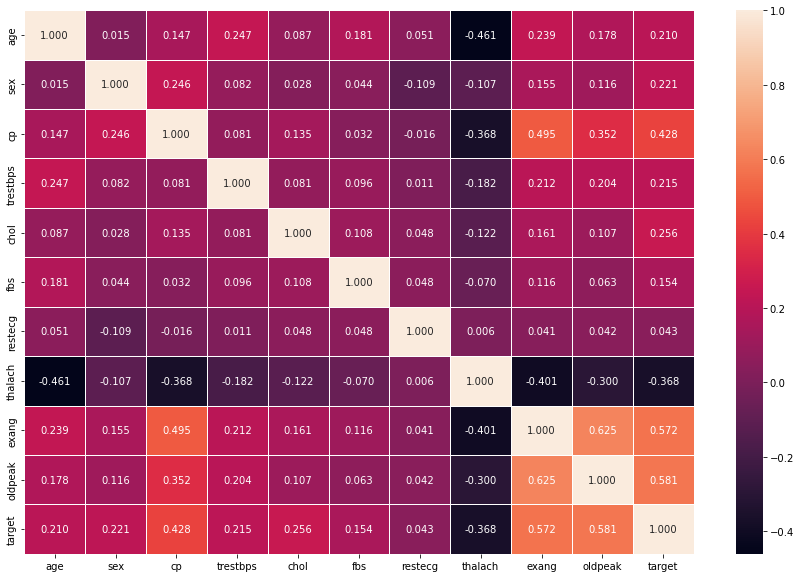

In [34]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

Coding diatas </br>
Melakukan pengecekkan korelasi antar fitur dengan visualisasi supaya lebih enak dan jelas untuk dilihat.

## Konstruksi Data

Tahap konstruksi data (data construction) merujuk pada proses membangun atau menyusun data untuk analisis lebih lanjut. Tahap ini melibatkan berbagai kegiatan untuk mempersiapkan data agar dapat digunakan secara efektif.
Namun padatahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali.
Tahap konstruksi data ini sangat penting untuk memastikan bahwa data yang digunakan dalam analisis atau pemodelan memiliki kualitas yang baik dan dapat diandalkan. Proses ini dapat memerlukan keahlian statistik, dan keterampilan teknis dalam pemrograman dan manipulasi data.

In [35]:
#Melakukan pengecekan tipe dan jumlah data
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [36]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah Menyesuaikan tipe dataset kita , kita harus memisahkan antara fitur dan target lalu simpan kedalam variabel.

In [37]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Coding diatas </br>
a. dalam variabel X berisi data yang digunakan sebagai variabel independen (fitur) dalam pemodelam tanpa kolom 'target' </br>
b. dalam variabel y memilih kolom dari DataFrame, yang diasumsikan sebagai kolom target. variabel y berisi data yang akan digunakan sebagai variabel dependen dalam pemodelan. Variabel ini berisi label atau nilai yang ingin diprediksi oleh model.

Setelah kita memisahkan fitur dan target, langkah yang disarankan adalah melakukan pemeriksaan awal terhadap distribusi jumlah setiap kategori target. Dengan grafik visual supaya lebih mudah dan enak dilihat

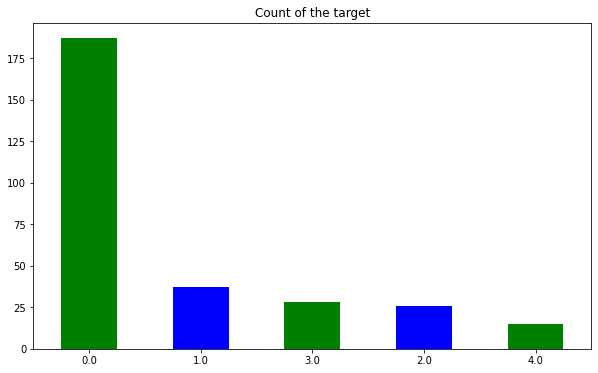

In [38]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Grafik di atas menunjukkan bahwa distribusi jumlah target tidak seimbang, sehingga perlu dilakukan penyeimbangan sebelum melanjutkan analisis. Penyeimbangan target dapat dilakukan melalui dua cara, yaitu oversampling dan undersampling. Oversampling diterapkan ketika jumlah dataset relatif sedikit, sementara undersampling digunakan ketika jumlah data terlalu banyak. Dalam konteks ini, kita akan melakukan oversampling karena jumlah data kita tidak banyak. Salah satu metode oversampling yang akan kita terapkan adalah SMOTE.

In [39]:
from imblearn.over_sampling import SMOTE

Coding diatas Mengimpor kelas SMOTE dari pustaka imbalanced-learn.

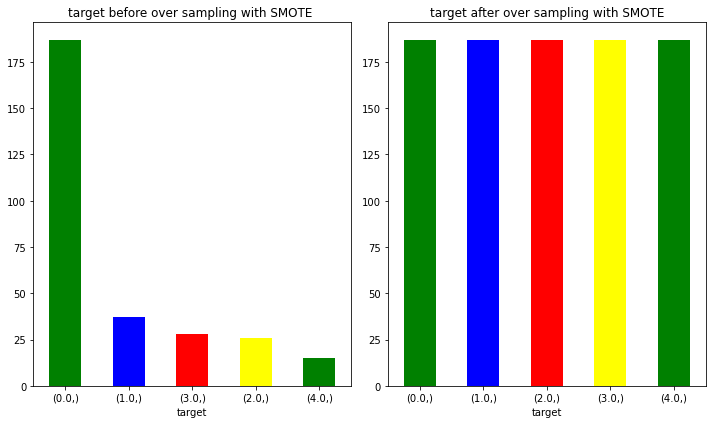

In [40]:
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)

new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

Coding diatas </br>
Hasilnya adalah dua grafik batang yang membandingkan distribusi nilai target sebelum dan sesudah oversampling dengan SMOTE. Plot pertama menunjukkan distribusi sebelum oversampling, sementara plot kedua menunjukkan distribusi setelah penerapan oversampling menggunakan SMOTE.Pada Grafik diatas dapat dilihat ketika target belum di seimbangkan dan sudah diseimbangkan menggunakan oversampling.

In [41]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

Coding diatas melakukan pengecekkan value / jumlah kemunculan setiap nilai pada kolom, pengecekkan pada dataframe new_df1

In [42]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Coding diatas melakukan pengecekkan value / jumlah kemunculan setiap nilai pada kolom, pengecekkan pada dataframe new_df2, setelah dilakukan oversampling maka jumlah value sama rata yaitu 188 disamakan berdasarkan nilai 0 pada kolom.

Setelah menyeimbangkan persebaran jumlah target kita akan melakukan mengecekan apakah perlu dilakukan normalisasi/standarisasi pada
datset menggunakan .describe

In [43]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi diatas terlihat bahwa dataset memiliki rentang nilai yang cukup bervariasi pada standar deviasi setiap fiturnya. Oleh karena itu, diperlukan normalisasi atau standarisasi untuk mengurangi rentang antara standar deviasi dari setiap kolom.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

935

Coding diatas merupakan Kode yang menerapkan MinMaxScaler dari scikit-learn untuk melakukan normalisasi pada dataset yang telah mengalami proses oversampling dengan SMOTE. Objek `scaler` dibuat menggunakan MinMaxScaler, dan kemudian metode `fit_transform` digunakan untuk melakukan normalisasi pada dataset yang telah di-oversampling (`X_smote_resampled`). Hasil normalisasi disimpan dalam variabel `X_smote_resampled_normal`. Panjang atau jumlah baris dari data yang telah dinormalisasi dicetak dengan menggunakan fungsi `len()`. Proses normalisasi ini bertujuan untuk mengubah nilai-nilai dalam dataset agar berada dalam rentang antara 0 dan 1, sehingga memudahkan proses pembelajaran pada model machine learning.

In [45]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

Coding diatas dilakukan pembagian dataset yang telah mengalami oversampling dengan menggunakan metode SMOTE menjadi dua set data: data pelatihan (X_train, y_train) dan data pengujian (X_test, y_test). Fungsi train_test_split dari scikit-learn digunakan untuk melakukan pembagian, di mana parameter test_size=0.2 menunjukkan bahwa 20% dari data akan dijadikan data pengujian. Pengaturan random_state=42 digunakan untuk memastikan reproduktibilitas hasil dan stratify=y_smote_resampled digunakan agar distribusi kelas dalam kedua set data tetap seimbang seperti dalam data asli yang telah di-oversampling. Proses ini bertujuan untuk menyediakan dua set data yang dapat digunakan dalam melatih dan menguji model machine learning, sehingga dapat melakukan evaluasi kinerja model dengan baik pada data yang belum pernah dilihat sebelumnya.

In [48]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

Coding diatas melakukan pembagian dataset yang telah mengalami oversampling dan normalisasi dengan menggunakan metode Min-Max Scaling (MinMaxScaler) menjadi dua set data: data pelatihan (X_train_normal, y_train_normal) dan data pengujian (X_test_normal, y_test_normal). Fungsi train_test_split dari scikit-learn digunakan untuk memisahkan data, dengan parameter test_size=0.2 menunjukkan bahwa 20% dari data akan dijadikan data pengujian. Pengaturan random_state=42 digunakan untuk memastikan reproduktibilitas hasil, dan stratify=y_smote_resampled digunakan agar distribusi kelas dalam kedua set data tetap seimbang, sesuai dengan distribusi kelas dalam data yang telah di-oversampling. Proses ini bertujuan untuk menyediakan dua set data yang dapat digunakan dalam melatih dan menguji model machine learning, dengan fitur-fitur yang telah dinormalisasi untuk memperoleh hasil yang lebih optimal dalam proses pembelajaran.








## Model

Pada tahap ini kita akan memulai untuk membangun sebuah model.
Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi
ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional.

In [49]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')
    
    metric_dict={'accuracy': round(acc,3),
    'recall': round(rcl,3),
    'F1 score': round(f1,3),
    'Precision score': round(ps,3)
    }
    return print(metric_dict)

### Oversample

#### KNN

In [50]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

a. Mengimpor kelas KNeighborsClassifier dari scikit-learn. KNeighborsClassifier adalah implementasi dari algoritma k-nearest neighbors (KNN) untuk klasifikasi.</br>
b. Mengimpor kelas RandomForestClassifier dari scikit-learn. RandomForestClassifier adalah implementasi dari algoritma Random Forest untuk klasifikasi.</br>
c. Mengimpor kelas XGBClassifier dari pustaka XGBoost. XGBClassifier adalah implementasi dari algoritma Extreme Gradient Boosting (XGBoost) untuk klasifikasi.</br>
d. Mengimpor fungsi accuracy_score dan classification_report dari scikit-learn. accuracy_score digunakan untuk mengukur akurasi model, sedangkan classification_report memberikan laporan yang detail termasuk precision, recall, dan f1-score untuk setiap kelas dalam model klasifikasi.

In [52]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

coding di atas membuat model klasifikasi menggunakan algoritma K-Nearest Neighbors (KNN) dengan memanfaatkan kelas KNeighborsClassifier dari scikit-learn. Pada baris pertama, objek model knn_model diinisialisasi dengan menggunakan KNeighborsClassifier, di mana n_neighbors=3 menunjukkan bahwa model akan mempertimbangkan 3 tetangga terdekat untuk menentukan kelas prediksi suatu observasi.

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN

In [53]:
y_pred_knn = knn_model.predict(X_test)

In [54]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



coding di atas merupakan bagian dari proses evaluasi model K-Nearest Neighbors (KNN) yang telah dilatih. Dilakukan evaluasi kinerja model KNN dengan menghitung dan mencetak akurasi menggunakan metrik accuracy_score untuk membandingkan prediksi model dengan label sebenarnyaLaporan klasifikasi ditampilkan, memberikan informasi rinci mengenai precision, recall, dan f1-score untuk setiap kelas dalam data pengujian. Dapat terlihat dari report diatas KNN model pada oversample mempunyai akurasi 75,4%

In [55]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

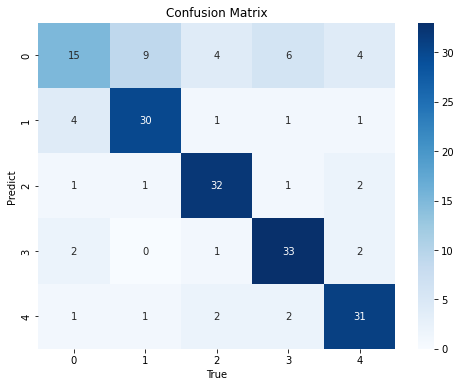

In [56]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### Random Forest

Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna mengatur jumlah pohon keputusan yang akan dibangun

In [57]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



Kode di atas digunakan untuk membuat prediksi menggunakan model Random Forest yang telah dilatih sebelumnya pada dataset pengujian.Dilakukan evaluasi kinerja model Random Forest dengan menghitung dan mencetak akurasi menggunakan metrik accuracy_score untuk membandingkan prediksi model dengan label sebenarnya Ditampilkan laporan klasifikasi menggunakan fungsi classification_report, yang memberikan informasi rinci tentang precision, recall, dan f1-score untuk setiap kelas dalam data pengujian. Proses ini memberikan gambaran tentang sejauh mana model Random Forest mampu melakukan klasifikasi dengan baik pada dataset pengujian. Dapat dilihat dari report diatas Random Forest pada metode oversample mempunyai akurasi 92%

In [59]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


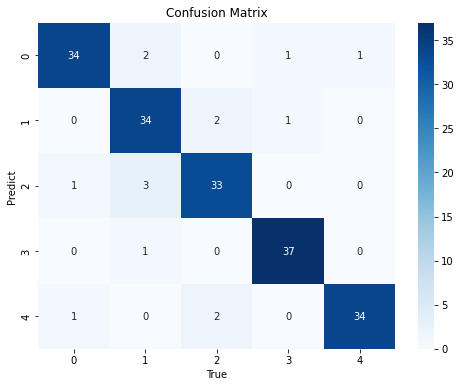

In [60]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### XGBoost

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna
untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [61]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [62]:
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



kode di atas digunakan untuk membuat prediksi menggunakan model XGBoost yang telah dilatih sebelumnya pada dataset pengujian. Dilakukan evaluasi kinerja model XGBoost dengan menghitung dan mencetak akurasi menggunakan metrik accuracy_score untuk membandingkan prediksi model dengan label sebenarnya. Ditampilkan laporan klasifikasi menggunakan fungsi classification_report, yang memberikan informasi rinci tentang precision, recall, dan f1-score untuk setiap kelas dalam data pengujian. Dapat dilihat dari report diatas XBoost pada metode oversample mempunyai akurasi 90,4%

In [63]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


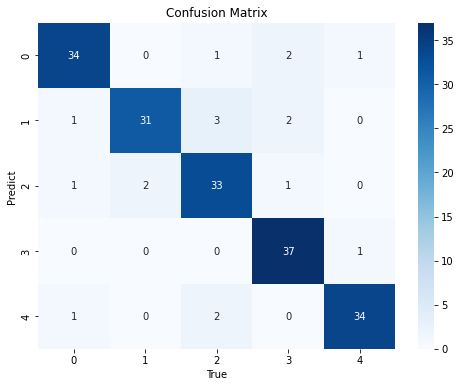

In [64]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Oversample + Normalisasi

Pada bagian ini kita akan membuat sebuah model yang dimana data yang dipakai kali ini yang sudah dilakukan oversample dan normalisasi.
Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada
masing-masing model.

#### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

a. diimpor kelas KNeighborsClassifier dari scikit-learn, yang merupakan implementasi algoritma K-Nearest Neighbors (KNN) untuk klasifikasi. </br>
b. mengimpor kelas RandomForestClassifier dari scikit-learn, yang merupakan implementasi algoritma Random Forest untuk klasifikasi. </br>
c. diimpor kelas XGBClassifier dari pustaka XGBoost, yang merupakan implementasi algoritma Extreme Gradient Boosting (XGBoost) untuk klasifikasi.</br>
d. diimpor dua fungsi evaluasi kinerja model, yaitu accuracy_score dan classification_report, dari scikit-learn. Fungsi accuracy_score digunakan untuk mengukur akurasi model, sedangkan classification_report memberikan laporan rinci yang mencakup precision, recall, dan f1-score untuk setiap kelas dalam model klasifikasi.

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

Model tersebut diinisialisasi dengan parameter n_neighbors=3, yang menentukan bahwa model akan mempertimbangkan 3 tetangga terdekat untuk menentukan kelas prediksi suatu observasi.

In [67]:
y_pred_knn = knn_model.predict(X_test_normal)

In [68]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



kode di atas digunakan untuk mengevaluasi model K-Nearest Neighbors (KNN) yang telah dilatih dengan data pengujian yang telah dinormalisasi . Akurasi model dihitung menggunakan metrik accuracy_score untuk membandingkan prediksi model  dengan label sebenarnya. Ditampilkan, memberikan informasi rinci tentang precision, recall, dan f1-score untuk setiap kelas dalam data pengujian yang telah dinormalisasi. Proses ini memberikan gambaran tentang sejauh mana model KNN yang menggunakan data yang telah dinormalisasi mampu melakukan klasifikasi pada dataset pengujian.
Dapat dilihat dari report diatas KNN pada metode Normalisasi + Oversample mempunyai akurasi 86,1%








In [69]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


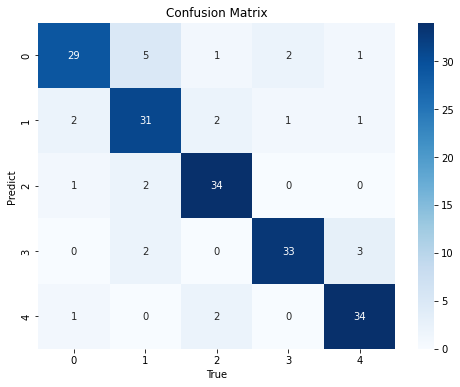

In [70]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### Random Forest

In [71]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [72]:
y_pred_rf = rf_model.predict(X_test_normal)

In [73]:
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



kode diatas dilakukan evaluasi terhadap model Random Forest yang telah dilatih sebelumnya dengan menggunakan data pengujian yang telah dinormalisasi.Akurasi model dihitung menggunakan metrik accuracy_score dengan membandingkan prediksi model dengan label sebenarnya. Ditampilkan laporan klasifikasi yang memberikan informasi rinci tentang precision, recall, dan f1-score untuk setiap kelas dalam data pengujian yang telah dinormalisasi. Proses ini memberikan gambaran tentang sejauh mana model Random Forest yang menggunakan data yang telah dinormalisasi mampu melakukan klasifikasi pada dataset pengujian. Dilihat dari report diatas model Random Forest dengan metode Oversample + Normalisasi mempunyai akurasi 92%








In [74]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


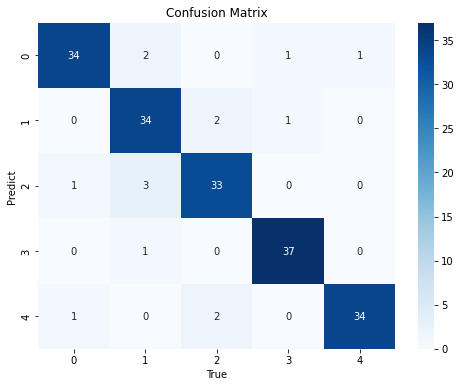

In [75]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### XGBoost

In [76]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [77]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [78]:
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [79]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


Coding di atas digunakan untuk mengevaluasi model XGBoost yang telah dilatih sebelumnya dengan menggunakan data pengujian yang telah dinormalisasi. Akurasi model dihitung menggunakan metrik accuracy_score untuk membandingkan prediksi model. Ditampilkan, yang memberikan informasi rinci tentang precision, recall, dan f1-score untuk setiap kelas dalam data pengujian yang telah dinormalisasi. Proses ini memberikan gambaran tentang sejauh mana model XGBoost yang menggunakan data yang telah dinormalisasi mampu melakukan klasifikasi pada dataset pengujian. Dari report diatas dapat dilihat XBOost dalam metode Oversample + Normalisasi mempunyai akurasi 90,4%

In [80]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

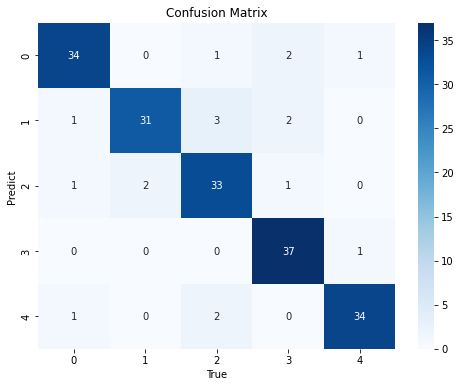

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Tuning + Normalization + Oversample

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan
adalah data yang sudah dilakukan TunNIng Parameter, Normalisasi, dan Oversample.

#### KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Coding diatas Mengimpor kelas KNeighborsClassifier (KNN), RandomForestClassifier, dan XGBClassifier dari scikit-learn dan XGBoost, yang merupakan implementasi dari algoritma K-Nearest Neighbors, Random Forest, dan Extreme Gradient Boosting untuk klasifikasi. </br>
Mengimpor fungsi evaluasi kinerja model, seperti accuracy_score dan classification_report, dari scikit-learn. Selain itu, juga diimpor fungsi RandomizedSearchCV untuk melakukan pencarian parameter secara acak dan validasi silang (cross-validation).

Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [83]:
knn_model = KNeighborsClassifier()

In [84]:
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"],
"weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"],
"leaf_size": range(10, 61),
}

Coding di atas mendefinisikan param_grid, yang merupakan himpunan parameter yang akan dieksplorasi dalam pencarian parameter menggunakan metode Randomized Search Cross-Validation pada model K-Nearest Neighbors (KNN). </br>
a. Mencakup rentang nilai dari 3 hingga 20. </br>
b. Mencakup tiga metrik jarak yang dapat digunakan oleh model KNN, yaitu "euclidean" (jarak Euclidean), "manhattan" (jarak Manhattan), dan "chebyshev" (jarak Chebyshev).</br>
c. Mencakup dua opsi untuk penentuan bobot tetangga, yaitu "uniform" (bobot seragam) dan "distance" (bobot sebanding dengan kebalikan jarak).</br>
d. Mencakup tiga algoritma yang dapat digunakan oleh model KNN</br>
e. Mencakup rentang nilai dari 10 hingga 60

In [85]:
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

Coding diatas merupakan proses akan mencoba secara acak kombinasi parameter dari param_grid, melatih dan mengevaluasi model KNN pada setiap iterasi, dan akhirnya menghasilkan kombinasi parameter yang memberikan kinerja terbaik berdasarkan metrik akurasi.

In [86]:
knn_model.fit(X_train_normal, y_train_normal)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': range(10, 61),
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': range(3, 21),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [87]:
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 59, 'algorithm': 'ball_tree'}


kode di atas digunakan untuk mendapatkan parameter terbaik (best parameters) yang dihasilkan dari proses Randomized Search Cross-Validation pada model K-Nearest Neighbors (KNN). 

In [88]:
y_pred_knn = knn_model.predict(X_test_normal)

In [89]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.86      0.86      0.86        37
         2.0       0.92      0.92      0.92        37
         3.0       0.97      0.97      0.97        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



kode di atas, dilakukan evaluasi terhadap model K-Nearest Neighbors (KNN) yang telah dituning parameter menggunakan hasil dari Randomized Search Cross-Validation. laporan klasifikasi (classification_report) ditampilkan, memberikan informasi rinci tentang precision, recall, dan f1-score untuk setiap kelas dalam data pengujian yang telah dinormalisasi. Proses ini memberikan gambaran holistik tentang kinerja model KNN yang telah disesuaikan parameter pada dataset pengujian. Dari report diatas dapat terlihat KNN model dengan metode Tunning + normalisasi + oversample mempunyai akurasi 93%

In [90]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.93, 'Precision score': 0.93}


In [91]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

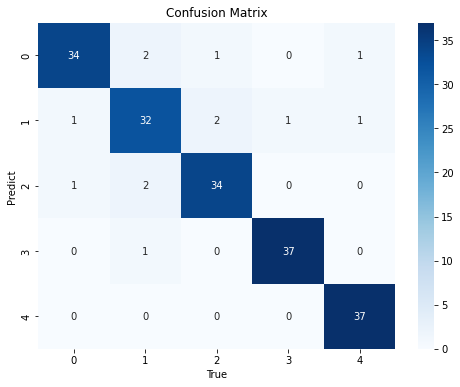

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### Random Forest

In [93]:
rf_model = RandomForestClassifier()

In [94]:
param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"],
# "random_state": [42, 100, 200]
}

Coding diatas merupakan himpunan parameter yang akan dieksplorasi dalam pencarian parameter menggunakan metode Randomized Search Cross-Validation pada model Random Forest. </br>
a. Mencakup dua nilai, yaitu 100 dan 200. Parameter ini menentukan jumlah pohon yang akan digunakan dalam pembentukan model Random Forest.</br>
b. Mencakup dua nilai, yaitu 10 dan 15. Parameter ini menentukan kedalaman maksimum</br>
c. Mencakup dua nilai, yaitu 1 dan 2. </br>
d. Mencakup dua nilai, yaitu 2 dan 5. </br>
e. Mencakup dua nilai, yaitu "sqrt" dan "log2". Parameter ini menentukan jumlah fitur maksimum yang harus dipertimbangkan dalam mencari pemisahan terbaik pada setiap simpul.

In [95]:
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

kode diatas menggunakan metode Randomized Search Cross-Validation (RandomizedSearchCV). Variabel (rf_model) dioptimalkan dengan mencari parameter terbaik dari himpunan nilai yang telah ditentukan dalam param_grid. Dalam proses ini, akan dilakukan 100 iterasi pencarian parameter secara acak, dengan validasi silang menggunakan 5 lipatan. Pengaturan n_jobs=-1 memungkinkan pemrosesan paralel untuk mempercepat proses.

In [96]:
rf_model.fit(X_train_normal, y_train_normal)

C:\Users\NEL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]})

In [97]:
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


kode di atas digunakan untuk mendapatkan parameter terbaik (best parameters) yang dihasilkan dari proses Randomized Search Cross-Validation pada model Random Forest.

In [98]:
y_pred_rf = rf_model.predict(X_test_normal)

In [99]:
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.882
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89        38
         1.0       0.82      0.84      0.83        37
         2.0       0.80      0.86      0.83        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.86      0.91        37

    accuracy                           0.88       187
   macro avg       0.89      0.88      0.88       187
weighted avg       0.89      0.88      0.88       187



Coding di atas digunakan untuk mengevaluasi model Random Forest yang telah dituning parameter dengan hasil dari Randomized Search Cross-Validation. Akurasi model dihitung dengan membandingkan prediksi model dengan label sebenarnya. Ditampilkan, memberikan informasi rinci tentang precision, recall, dan f1-score untuk setiap kelas dalam data pengujian yang telah dinormalisasi. Proses ini memberikan gambaran tentang sejauh mana model Random Forest yang menggunakan data yang telah dituning parameter mampu melakukan klasifikasi pada dataset pengujian. Dilihat dari Report diatas Model Random FOrest dengan Metode Tunning + Normalisasi + Oversample mempunyai akurasi 88,2%

In [100]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.882, 'recall': 0.882, 'F1 score': 0.883, 'Precision score': 0.886}


In [101]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

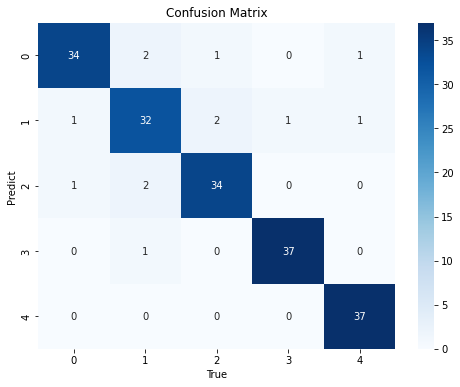

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### XGBoost

In [103]:
xgb_model = XGBClassifier()

In [104]:
param_grid = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}

kode diatas mendefinisikan param_grid, yang merupakan himpunan parameter yang akan dieksplorasi dalam pencarian parameter menggunakan metode Randomized Search Cross-Validation pada model XGBoost. </br>
a. Mencakup tiga nilai, yaitu 3, 5, dan 7.</br>
b. Mencakup dua nilai, yaitu 0.01 dan 0.1. Parameter ini menentukan tingkat pembelajaran yang mengontrol seberapa besar bobot akan diperbarui pada setiap langkah iterasi.</br>
c. Mencakup dua nilai, yaitu 100 dan 200. Parameter ini menentukan jumlah pohon keputusan yang akan digunakan dalam model XGBoost. </br>
d. Mencakup dua nilai, yaitu 0 dan 0.1.</br>
e. Mencakup dua nilai, yaitu 0.7 dan 0.8. Parameter ini menentukan fraksi fitur yang akan dipertimbangkan pada setiap iterasi

In [105]:
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

kode diatas menggunakan metode Randomized Search Cross-Validation (RandomizedSearchCV). Variabel (xgb_model) dioptimalkan dengan mencari parameter terbaik dari himpunan nilai yang telah ditentukan dalam param_grid. Dalam proses ini, akan dilakukan 10 iterasi pencarian parameter secara acak, dengan validasi silang menggunakan 5 lipatan. Pengaturan n_jobs=-1 memungkinkan pemrosesan paralel untuk mempercepat proses.

In [106]:
xgb_model.fit(X_train_normal, y_train_normal)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]})

In [107]:
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


kode di atas digunakan untuk mendapatkan parameter terbaik (best parameters) yang dihasilkan dari proses Randomized Search Cross-Validation pada model XBoost.

In [108]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [109]:
#Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        38
         1.0       0.88      0.81      0.85        37
         2.0       0.86      0.86      0.86        37
         3.0       0.95      1.00      0.97        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



kode di atas digunakan untuk mengevaluasi model XGBoost yang telah dituning parameter dengan hasil dari Randomized Search Cross-Validation.  Akurasi model dihitung dengan membandingkan prediksi model  dengan label sebenarnya . Ditampilkan memberikan informasi rinci tentang precision, recall, dan f1-score untuk setiap kelas dalam data pengujian yang telah dinormalisasi. Proses ini memberikan gambaran tentang sejauh mana model XGBoost yang menggunakan data yang telah dituning parameter mampu melakukan klasifikasi pada dataset pengujian. Terlihat dari report diatas Model XBoost dengan metode Tuning + normalisasi + Oversample mempunyai akurasi 90,9%

In [110]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.908, 'Precision score': 0.909}


In [111]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

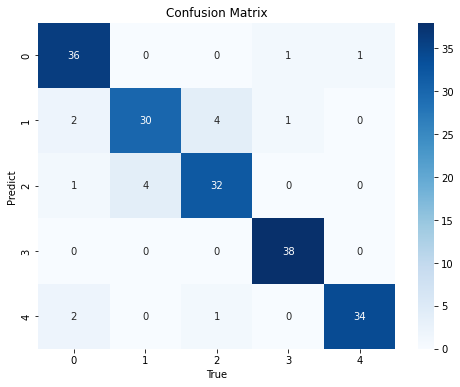

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Evaluasi 

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model
algoritma yang menghasilkan hasil akurasi terbaik.

In [113]:
import matplotlib.pyplot as plt

Coding diatas mengimpor modul matplotlib.pyplot sebagai plt, yang digunakan untuk membuat visualisasi grafis. 

In [114]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
accuracy_rf_smote*100,accuracy_xgb_smote*100]})

model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


Coding diatas untuk menampilkan hasil Model dan berapa akurasinya secara numerik dalam tabel dari Metode Oversampel. Terlihat dari report langsung perbandingan KNN mempunyai akurasi 75,4% RF 92% dan Xboost 90,4%

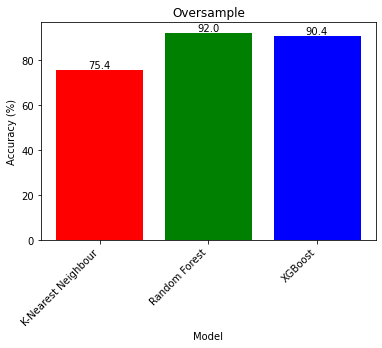

In [115]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

Coding diatas untuk menampilkan hasil Model dan berapa akurasinya secara visual dengan grafik dari Metode Oversampel. Terlihat dari report langsung perbandingan KNN mempunyai akurasi 75,4% RF 92% dan Xboost 90,4%

In [116]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


Coding diatas untuk menampilkan hasil Model dan berapa akurasinya secara numerik dalam tabel dari Metode Normalisasi + Oversampel. Terlihat dari report langsung perbandingan KNN mempunyai akurasi 86,1% RF 92% dan Xboost 90,4%

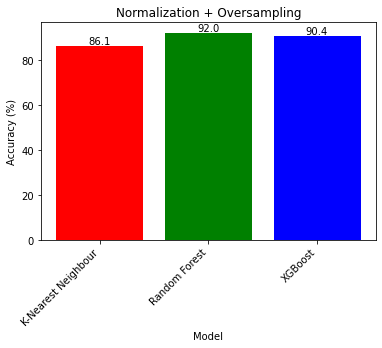

In [117]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

Coding diatas untuk menampilkan hasil Model dan berapa akurasinya secara visual dalam grafik dari Metode Normalisasi + Oversampel. Terlihat dari report langsung perbandingan KNN mempunyai akurasi 86,1% RF 92% dan Xboost 90,4%

In [118]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,93.0
1,Random Forest,88.2
2,XGBoost,90.9


Coding diatas untuk menampilkan hasil Model dan berapa akurasinya secara numerik dalam tabel dari Metode Normalisasi + Tunning + Oversampel. Terlihat dari report langsung perbandingan KNN mempunyai akurasi 93% RF 88,2% dan Xboost 90,9%

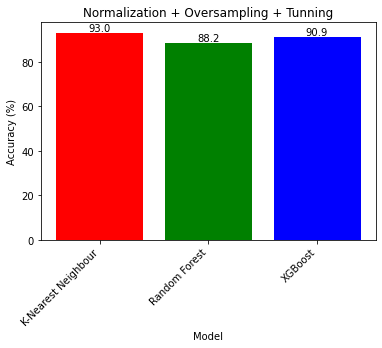

In [119]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

Coding diatas untuk menampilkan hasil Model dan berapa akurasinya secara visual dalam grafik dari Metode Normalisasi + tunning + Oversampel. Terlihat dari report langsung perbandingan KNN mempunyai akurasi 93% RF 88,2% dan Xboost 90,9%

In [122]:
# Data frame
model_compBest = pd.DataFrame({
'Model': ['K-Nearest Neighbour Normalization + Oversampling + Tunning', 'Random Forest OverSample',
'XGB Normalization + Oversampling + Tunning'],
'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
accuracy_xgb_smote_normal_Tun*100]
})

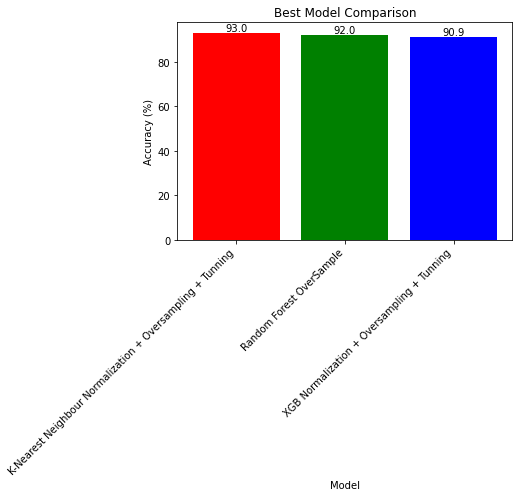

In [123]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

Dari coding diatas menampilkan hasilvisual dalam grafik dengan melakukan comparasi antara metode Oversample, metode Normalisasi + oversample, metode Tunning + normalisasi + oversample. Terlihat bahwa model KNN terbaik dengan metode Normalisasi + Oversample + Tunning. Model RF terbaik pada metode Oversample. Model XBoost terbaik pada metode Oversample + normalisasi+ Tunning

## Streamlit

## Kesimpulan

Dari hasil penelitian, dapat disimpulkan bahwa penerapan model klasifikasi menggunakan algoritma KNN, Random Forest, dan XGBoost dengan penanganan data yang mencakup random oversampling SMOTE, tunning dengan RandomizedSearchCV, dan normalisasi memberikan hasil yang beragam. Pada kasus klasifikasi dengan menggunakan metode Random Oversampling SMOTE, model KNN mencapai akurasi sebesar 75.4%, sementara model Random Forest dan XGBoost memiliki akurasi masing-masing sebesar 92% dan 90.4%. Pada percobaan selanjutnya dengan normalisasi data, akurasi model KNN meningkat menjadi 86.1%, sementara model Random Forest dan XGBoost tetap pada tingkat akurasi sebelumnya, yaitu 92% dan 90.4%. Selanjutnya, setelah melakukan tunning dengan RandomizedSearchCV, normalisasi, dan Random Oversampling SMOTE, model KNN mencapai akurasi tertinggi sebesar 93%, sementara model Random Forest mengalami penurunan akurasi menjadi 88.2%, dan model XGBoost mencapai akurasi 90.9%. Secara keseluruhan, dapat disimpulkan bahwa penanganan ketidakseimbangan data dengan tunning parameter, normalisasi, dan oversampling memiliki dampak yang signifikan terhadap performa model klasifikasi. Pemilihan model terbaik dan penyesuaian parameter optimal dapat meningkatkan akurasi dan kinerja model secara keseluruhan.